#                                                           **OPTIMAL PRODUCT PACKING LENGTH**

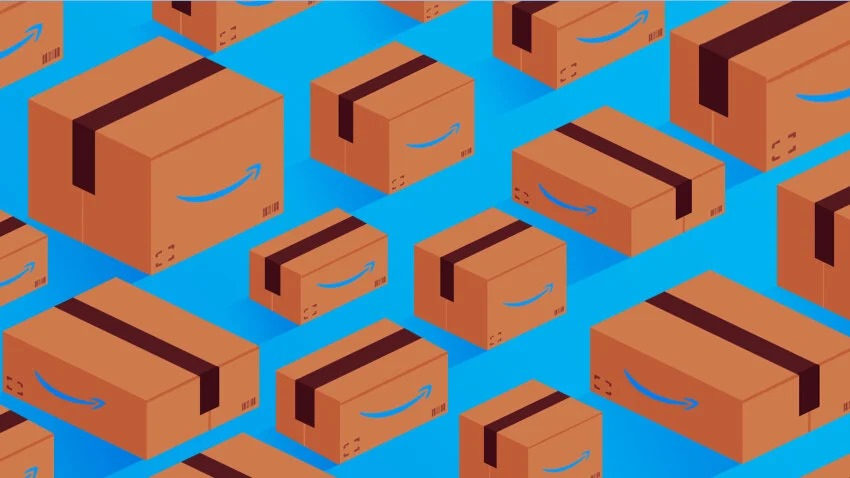

Collaborators: Souri Satya Saketh Ravi (121292803), Banda Manvi (121189806), Bodla Krishna Vamshi (121322456)


##                                           **INTRODUCTION**


                                           
                          


The purpose of this tutorial is to guide you through the data science lifecycle, showcasing a variety of data science concepts. By following this process, we aim to build a predictive model that estimates the length of a package using attributes available in the Amazon ML Challenge 2023 dataset. The data science lifecycle we’ll follow includes:

1. Data collection
2. Data processing
3. Exploratory analysis and data visualization
4. Model building, analysis, and testing
5. Interpretation of results

The overarching goal of the data science lifecycle is to uncover patterns, answer a specific question, or solve a practical problem. In this case, we aim to address the question: What attributes of a package can be used to accurately predict its length? While this tutorial won’t deliver an exact or definitive solution, it will provide insights into the key factors influencing package length and establish a framework for future improvements.

By building a model to predict package length, we can help optimize several aspects of logistics and operations. For instance, accurate predictions can assist in shipping cost estimation, warehouse storage planning, and vehicle load optimization. Understanding these factors can also support sustainability efforts by minimizing packaging waste and improving resource allocation.

Through this analysis, we will explore how features in the dataset—such as package weight, dimensions, type of product, and shipping method—correlate with length. For example:

If heavier packages tend to be longer, weight could be a significant predictor.
If certain product categories typically have consistent packaging sizes, product type could play a key role.
By addressing the challenge of predicting package length, this project illustrates how machine learning can be applied to solve real-world problems and deliver operational efficiencies.

                                 



# **DATA COLLECTION**
The first step in building a predictive model is to gather the data necessary to answer our question. Data collection is a critical phase in the data science lifecycle, as the quality and relevance of the dataset directly influence the performance and accuracy of the machine learning model. In this case, the dataset we use will serve as the foundation for training the model to predict package length.

In this project, we will use the dataset provided as part of the Amazon ML Challenge 2023. This dataset has been curated specifically to capture attributes relevant to packages handled in logistics operations.

In a real-world scenario, companies often need to collect their own data through experiments, manual measurements, or automated systems like barcode scanners and IoT sensors. However, datasets like the one we are using for this project are pre-collected and readily available, saving significant time and effort in the data collection process. Since this dataset has already been prepared and made accessible, we can focus on processing and analyzing it.

By using this dataset, we can ensure our predictions are grounded in real-world logistics data, allowing our model to uncover meaningful patterns and relationships. A good dataset not only makes model training easier but also ensures that the predictions are accurate and applicable to real scenarios.

In [ ]:
import requests, zipfile, io
url = "https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall("/afs/glue.umd.edu/home/glue/k/b/kbodla/home/MSML602_Final_Project")

In [ ]:
import pandas as pd
df = pd.read_csv('dataset/train.csv')
df.head()

PRODUCT_ID                                              TITLE  \
0     1925202  ArtzFolio Tulip Flowers Blackout Curtain for D...   
1     2673191  Marks & Spencer Girls' Pyjama Sets T86_2561C_N...   
2     2765088  PRIKNIK Horn Red Electric Air Horn Compressor ...   
3     1594019  ALISHAH Women's Cotton Ankle Length Leggings C...   
4      283658  The United Empire Loyalists: A Chronicle of th...   

                                       BULLET_POINTS  \
0  [LUXURIOUS & APPEALING: Beautiful custom-made ...   
1  [Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...   
2  [Loud Dual Tone Trumpet Horn, Compatible With ...   
3  [Made By 95%cotton and 5% Lycra which gives yo...   
4                                                NaN   

                                         DESCRIPTION  PRODUCT_TYPE_ID  \
0                                                NaN             1650   
1                                                NaN             2755   
2  Specifications: Color: Red, Material: Aluminiu...             7537   
3  AISHAH Women's Lycra Cotton Ankel Leggings. Br...             2996   
4                                                NaN             6112   

   PRODUCT_LENGTH  
0     2125.980000  
1      393.700000  
2      748.031495  
3      787.401574  
4      598.424000

# **DATA CLEANING**

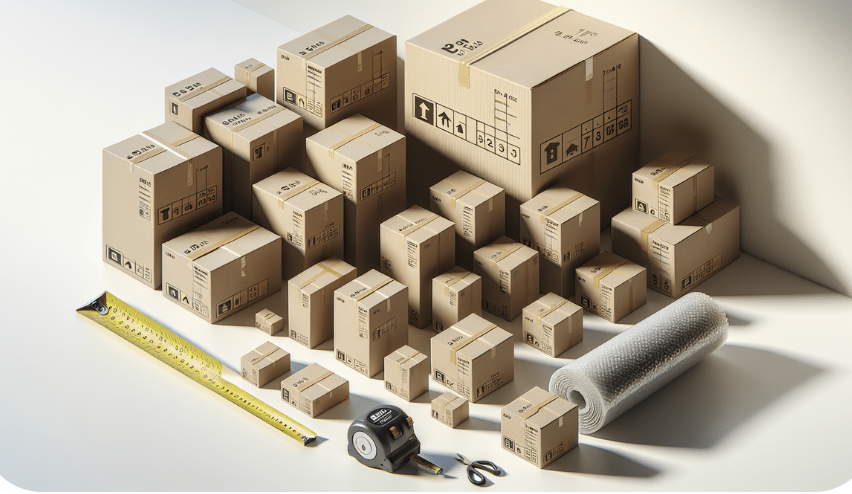


Before we can process our data with a machine learning model or even analyze it more effectively, we need to prepare it. This preparation, or data preprocessing, can involve several steps, such as:

Removing unnecessary data,
Filling in missing values
Adjusting the format, scale, or units of the data
Creating new, more useful features from existing ones
It's important to note that the steps of data cleaning and exploratory data analysis (EDA) often overlap. In fact, conducting exploratory analysis can help identify what needs to be cleaned or transformed. For example, we might plot two features against each other to spot trends, and this could reveal the need to create a new feature that could improve the model's predictions.

Exploratory analysis involves analyzing the dataset before feeding it into a machine learning model. This can include visualizing relationships between features or investigating individual data points. The goal is to gain insights into the data, uncover any patterns or issues, and potentially refine the questions you're asking.

In [ ]:
df.isnull().sum()

PRODUCT_ID               0
TITLE                   13
BULLET_POINTS       837366
DESCRIPTION        1157382
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [ ]:
df[(df['DESCRIPTION'].isna() | (df['DESCRIPTION'] == '')) &
   (df['BULLET_POINTS'].isna() | (df['BULLET_POINTS'] == ''))]

PRODUCT_ID                                              TITLE  \
4            283658  The United Empire Loyalists: A Chronicle of th...   
6            413758                      Ungifted: My Life and Journey   
11           833712                           La Mure / Valbonnais gps   
12           648364  J'ecris des lettres! premiers exercices d'écri...   
13          1991694  Mediterranean diet for beginners: 7Benefits of...   
...             ...                                                ...   
2249679      111250                         When Work Becomes Optional   
2249681      421168                                   Learning to Swim   
2249682       38572  Holy Bible: New International Version, Camel/c...   
2249691      571566  Comedy Wildlife Photography Awards: The perfec...   
2249696     1165754  Electro Voice EKX-BRKT15 | Wall Mount Bracket ...   

        BULLET_POINTS DESCRIPTION  PRODUCT_TYPE_ID  PRODUCT_LENGTH  
4                 NaN         NaN             6112         598.424  
6                 NaN         NaN               23         598.000  
11                NaN         NaN                1         433.070  
12                NaN         NaN                1         759.841  
13                NaN         NaN               32         600.000  
...               ...         ...              ...             ...  
2249679           NaN         NaN               87         600.000  
2249681           NaN         NaN            12743         525.000  
2249682           NaN         NaN              129         488.188  
2249691           NaN         NaN             2968         271.250  
2249696           NaN         NaN              592        2900.000  

[783508 rows x 6 columns]

From the analysis, we observe that the title column contains only 13 missing values across 2 million rows, which makes it a concise but potentially limited feature. Removing rows with missing values in the title column is straightforward, but this approach risks losing valuable information from other columns, such as description and bullet points. To address this, we can explore combining these columns to enhance the dataset's richness. For instance, we could use combinations like title + bullet points, title + description, or bullet points + description. However, it’s worth noting that approximately 783,500 rows are null or empty simultaneously in both bullet points and description, making such combinations prone to significant data loss. A more efficient approach would be concatenating all three columns (title + description + bullet points) into a single feature. This strategy minimizes the impact of missing or empty values by leveraging information from all available columns, ensuring maximum retention of rows while enriching the feature set.

In [ ]:
df[(df['DESCRIPTION'].isna() | (df['DESCRIPTION'] == '')) &
   (df['BULLET_POINTS'].isna() | (df['BULLET_POINTS'] == ''))&
(df['TITLE'].isna() | (df['TITLE'] == ''))]

PRODUCT_ID TITLE BULLET_POINTS DESCRIPTION  PRODUCT_TYPE_ID  \
66157          1804   NaN           NaN         NaN              222   
196485       164542   NaN           NaN         NaN              150   
420890        16935   NaN           NaN         NaN             6104   
948754       566503   NaN           NaN         NaN              109   
1144461      678966   NaN           NaN         NaN                1   
1364032      548186   NaN           NaN         NaN                1   
1716822       20369   NaN           NaN         NaN              154   
1879925      496531   NaN           NaN         NaN                1   
1885213      555363   NaN           NaN         NaN              151   
2108453      113675   NaN           NaN         NaN             6044   
2174826      230468   NaN           NaN         NaN                1   

         PRODUCT_LENGTH  
66157           507.873  
196485          575.000  
420890          290.000  
948754          555.117  
1144461         685.038  
1364032        1228.344  
1716822        1040.000  
1879925         799.211  
1885213         846.455  
2108453         600.000  
2174826         750.000

With the newly created feature combining title + bullet points + description, we observe only 12 rows with simultaneous missing values. Given the large sample size, these rows can be effortlessly removed without any significant impact on the dataset.

In [ ]:
print(df['PRODUCT_TYPE_ID'].nunique())
print(df['PRODUCT_ID'].nunique())
len(df)

12907
2249698


2249698

We observe that the dataset's length matches the number of unique values in the product_id column, indicating that each row represents a distinct product. Meanwhile, there are 12,907 unique values in the product_type_id column. This suggests that product_type_id could represent broader categories, such as "books," while product_id identifies unique items within those categories. For example, a "Sherlock Holmes" book and a "Cooking" book may both fall under the "books" category but are distinct products. This insight leads us to the next step: analyzing the length statistics for each product_type_id

# **EXPLORATORY ANALYSIS**

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to uncover patterns, relationships, or anomalies while providing a clear understanding of the data's structure and distribution. It often involves calculating statistical measures, visualizing trends, and identifying potential outliers, serving as a critical first step before performing more advanced analyses or building predictive models.

In this case given below, we are focusing on understanding the distribution of PRODUCT_LENGTH across different PRODUCT_TYPE_ID values. It groups the data by PRODUCT_TYPE_ID and computes the mean and median PRODUCT_LENGTH for each group, summarizing the central tendencies of the data. The average values are then visualized using a horizontal bar chart, where the x-axis represents the average PRODUCT_LENGTH and the y-axis displays the PRODUCT_TYPE_ID. This visualization highlights the variation in product lengths across categories, making it easier to detect patterns, identify outliers, and gain insights into the dataset's structure.

In [ ]:
import matplotlib.pyplot as plt


stats = df.groupby('PRODUCT_TYPE_ID')['PRODUCT_LENGTH'].agg(['mean', 'median']).reset_index()

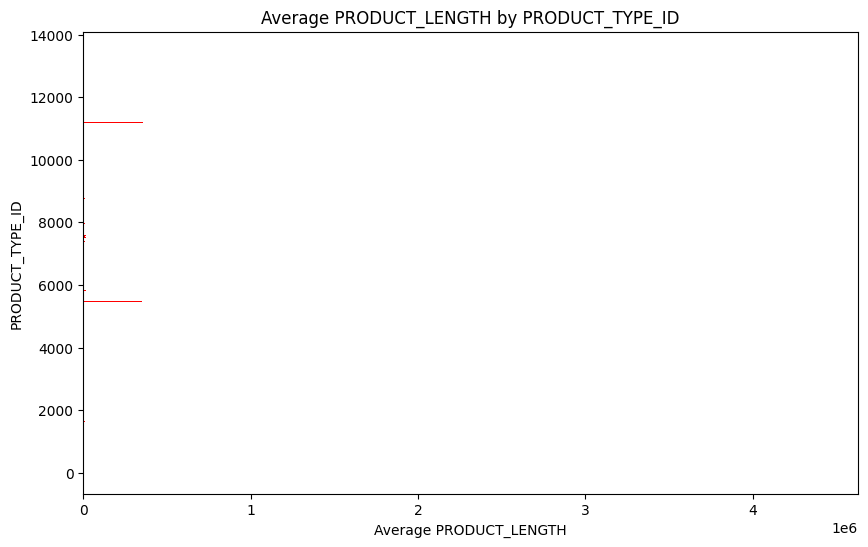

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['mean'], color='red')
plt.xlabel('Average PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Average PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()

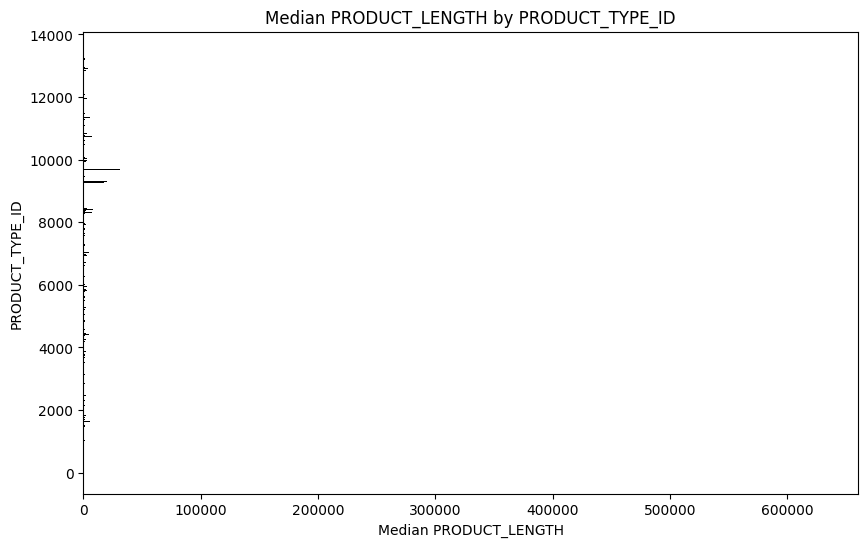

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['median'], color='black')
plt.xlabel('Median PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()

The above plots are not interpretable let us change the scale to log scale to plot the distributions.

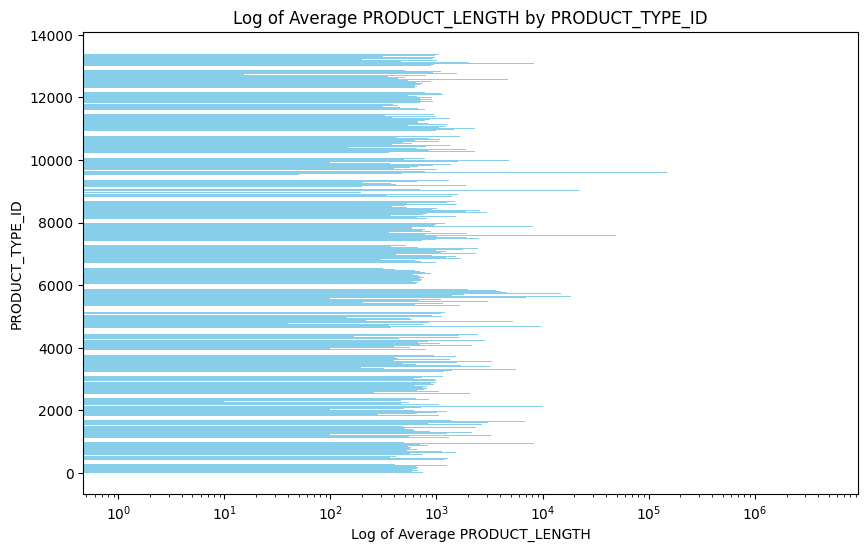

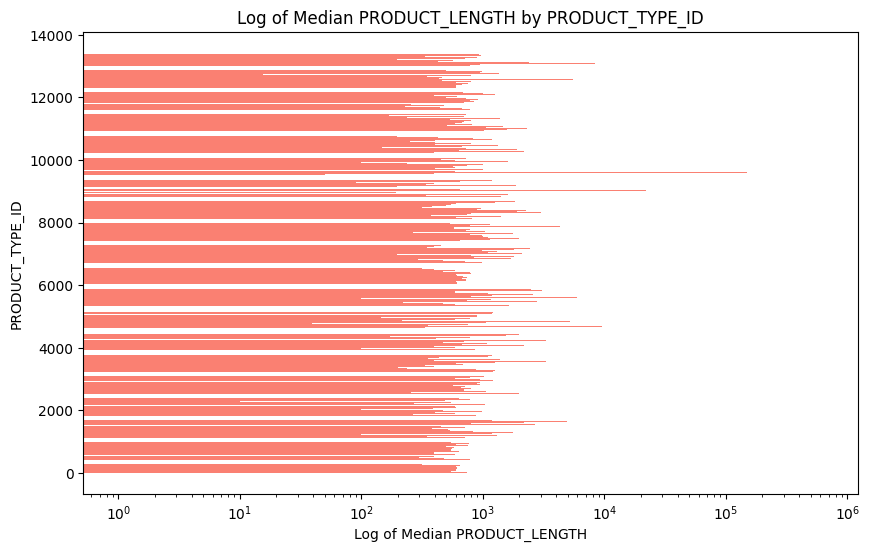

In [ ]:
import numpy as np


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['mean'], color='skyblue')
plt.xscale('log')
plt.xlabel('Log of Average PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Log of Average PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(stats['PRODUCT_TYPE_ID'], stats['median'], color='salmon')
plt.xscale('log')
plt.xlabel('Log of Median PRODUCT_LENGTH')
plt.ylabel('PRODUCT_TYPE_ID')
plt.title('Log of Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.show()


Logarithmic scaling reveals significant variations in product lengths across product types.Comparing average and median values may uncover skewness in the data, where certain product types exhibit extreme values that disproportionately affect the mean.

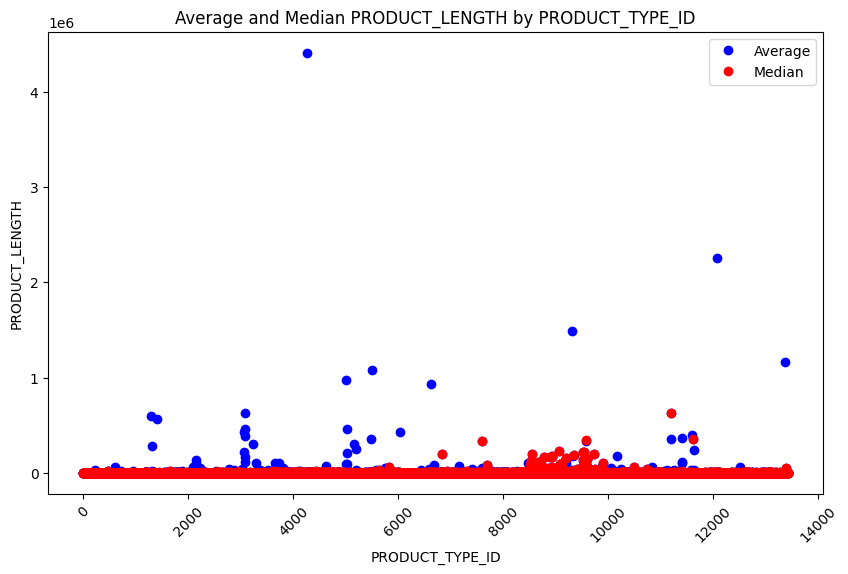

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(stats['PRODUCT_TYPE_ID'], stats['mean'], 'bo', label='Average')
plt.plot(stats['PRODUCT_TYPE_ID'], stats['median'], 'ro', label='Median')
plt.xlabel('PRODUCT_TYPE_ID')
plt.ylabel('PRODUCT_LENGTH')
plt.title('Average and Median PRODUCT_LENGTH by PRODUCT_TYPE_ID')
plt.legend()
plt.xticks(rotation=45)
plt.show()

This scatter plot compares the average (mean) and median PRODUCT_LENGTH for various PRODUCT_TYPE_ID values. Blue dots represent the average, while red dots represent the median product lengths for each product type. The x-axis corresponds to PRODUCT_TYPE_ID, and the y-axis indicates the PRODUCT_LENGTH. The plot reveals that the averages tend to exhibit higher variability and larger values compared to the medians, which remain more stable. Significant differences between the average and median for some product types suggest the presence of outliers or a skewed distribution in the data. A few product types show unusually large average product lengths, indicating potential anomalies or rare occurrences of extreme values. This visualization is valuable for assessing the distribution of product lengths across categories and identifying patterns or irregularities.

/tmp/ipykernel_1185105/2223150103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stats['mean'], palette='Set2')
/tmp/ipykernel_1185105/2223150103.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stats['mean'], log_scale=True, shade=True, color='skyblue')
/tmp/ipykernel_1185105/2223150103.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=stats['median'], palette='Set2')
/tmp/ipykernel_1185105/2223150103.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update y

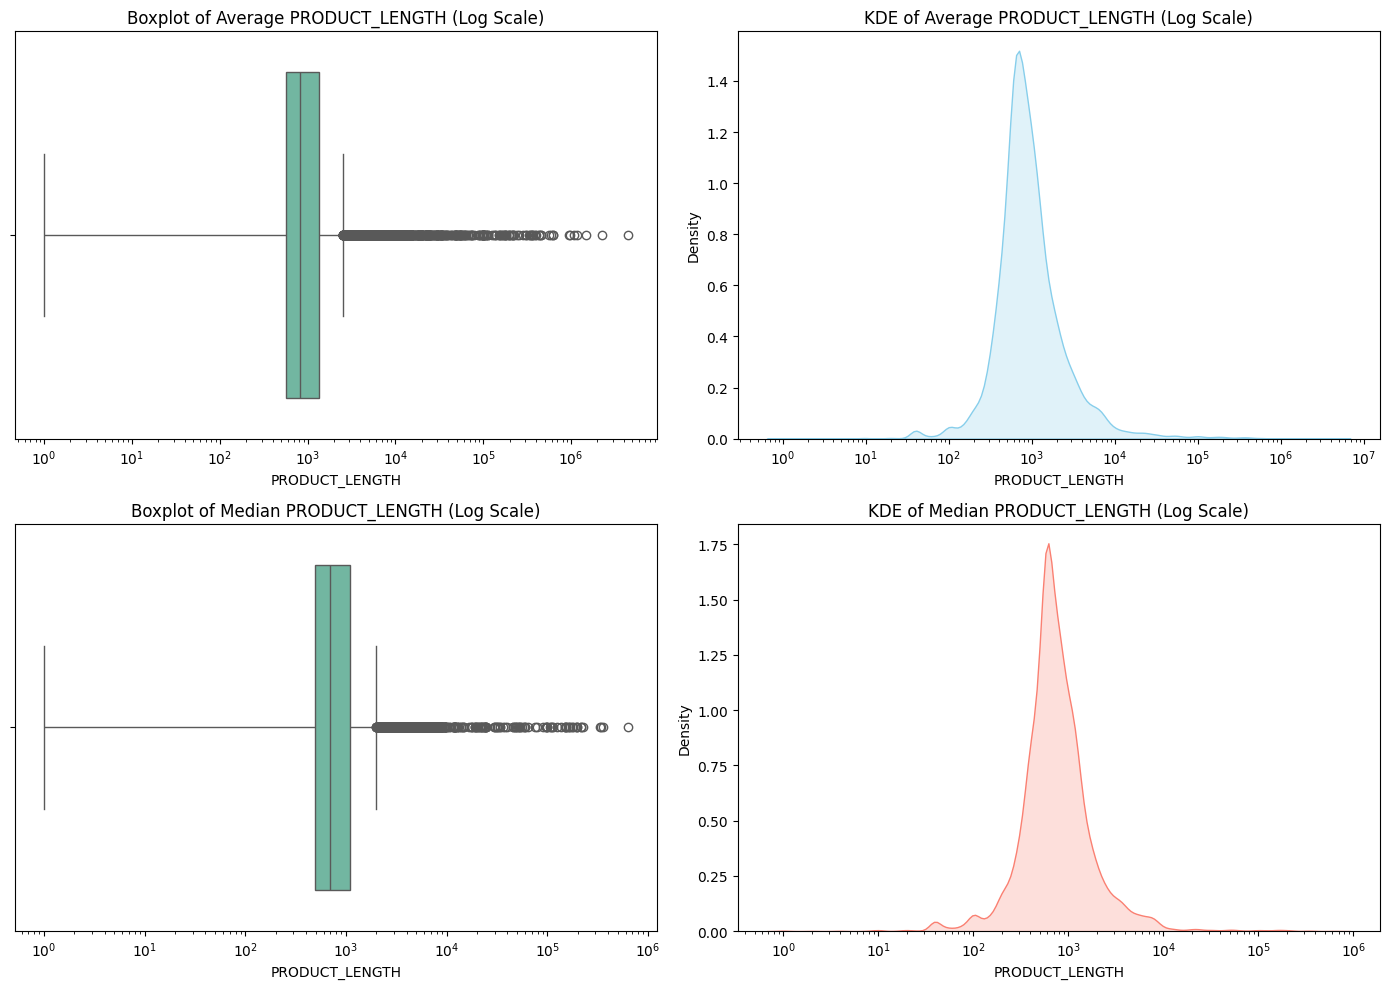

In [ ]:
import seaborn as sns


plt.figure(figsize=(14, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x=stats['mean'], palette='Set2')
plt.xscale('log')
plt.xlabel('PRODUCT_LENGTH')
plt.title('Boxplot of Average PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 2)
sns.kdeplot(stats['mean'], log_scale=True, shade=True, color='skyblue')
plt.xlabel('PRODUCT_LENGTH')
plt.ylabel('Density')
plt.title('KDE of Average PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 3)
sns.boxplot(x=stats['median'], palette='Set2')
plt.xscale('log')
plt.xlabel('PRODUCT_LENGTH')
plt.title('Boxplot of Median PRODUCT_LENGTH (Log Scale)')


plt.subplot(2, 2, 4)
sns.kdeplot(stats['median'], log_scale=True, shade=True, color='salmon')
plt.xlabel('PRODUCT_LENGTH')
plt.ylabel('Density')
plt.title('KDE of Median PRODUCT_LENGTH (Log Scale)')


plt.tight_layout()
plt.show()


We can see that both the average and median for each product_type have similar distribution, all the above data plots are sampled for each product id type to show variations in them.

# **TEXT PROCESSING**

With the exploratory data analysis (EDA) complete, the next step is text processing. One common method to extract information from text is TF-IDF, but it often proves insignificant for capturing deep contextual meaning. An alternative is using Word2Vec, which generates word vectors; however, a limitation of Word2Vec is that the vectors are computed based on individual words, without considering their meaning or placement within a sentence.

A more advanced approach is to use Sentence Transformers, which overcome this drawback by creating embeddings based on both the meaning of the words and their position in the sentence. For example, consider the sentences: "The bank was crowded" and "The riverside bank was crowded." Word2Vec would produce identical representations for the word "bank" in both cases. In contrast, Sentence Transformers differentiate between the two contexts, representing "bank" based on its specific meaning and placement in each sentence.

In [ ]:
df['all_feat'] = 'Title: ' + df['TITLE'].fillna('') + ' Bullet points: ' + df['BULLET_POINTS'].fillna('') + ' Description: ' + df['DESCRIPTION'].fillna('')

In [ ]:
df['all_feat'].isnull().sum()

np.int64(0)

In [ ]:
df['all_feat'][0]

'Title: ArtzFolio Tulip Flowers Blackout Curtain for Door, Window & Room | Eyelets & Tie Back | Canvas Fabric | Width 4.5feet (54inch) Height 5 feet (60 inch); Set of 2 PCS Bullet points: [LUXURIOUS & APPEALING: Beautiful custom-made curtains to decorate any home or office | Includes inbuilt tieback to hold the curtain | Completely finished and ready to hang on walls & windows,MATERIAL: Luxurious & versatile fabric with a natural finish | High colour fastness | State-of-the-art digital printing ensures colour consistency and prevents any fading | Eyelets; Cotton Canvas; Width 4.5feet (54inch) | Multicolour | PACKAGE: 2 Room Curtains Eyelets | SIZE: Height 5 feet (60 inch); SET OF 2 PCS,BLACKOUT CURTAIN: 100% opaque & heavy premium cotton canvas fabric | Tight knitted, long life & durable fabric | Printing only on front side with a plain colour back side,MADE TO PERFECTION: Large eyelets at the top to put hanging hooks | Perfectly tailored seams for durability | Refined stitching with a

In [ ]:
df['PRODUCT_TYPE_ID'].value_counts()

PRODUCT_TYPE_ID
1        121199
12064     57554
0         50505
123       31527
6104      29690
          ...  
11332         1
9522          1
4935          1
5005          1
8618          1
Name: count, Length: 12907, dtype: int64

In [ ]:
import pandas as pd
from collections import Counter
import re

def get_top_k_words(data, product_type_id, target_column, k=5):

    filtered_data = data[data['PRODUCT_TYPE_ID'] == product_type_id]


    combined_text = " ".join(filtered_data[target_column].dropna().astype(str))


    words = re.findall(r'\b\w+\b', combined_text.lower())


    most_common_words = Counter(words).most_common(k)

    return most_common_words

The above code,identifies the top k most frequent words in a specified text column (target_column) for a given PRODUCT_TYPE_ID in a DataFrame. It filters the data to include only rows matching the specified PRODUCT_TYPE_ID, concatenates the text from the target column into a single string (ignoring NaN values), and tokenizes the text into lowercase words using a regular expression. The word frequencies are then calculated using Counter, and the top k most common words, along with their frequencies, are extracted and returned.

In [ ]:
product_type_id = 9
target_column = 'TITLE'
k = 10

top_words = get_top_k_words(df, product_type_id, target_column, k)
print(top_words)

[('for', 159), ('nintendo', 122), ('controller', 78), ('2', 77), ('xbox', 75), ('switch', 69), ('game', 59), ('with', 55), ('the', 51), ('edition', 48)]


The code is designed to find the top 10 (k=10) most frequent words in the TITLE column (target_column) for rows where PRODUCT_TYPE_ID equals 9. The result is printed as a list of tuples, where each tuple contains a word and its corresponding frequency.



One challenge with this dataset is that the actual product lengths for the test data are not publicly available. To create a test set, we first filter out PRODUCT_TYPE_ID values with fewer than 10 entries. Then, we split the dataset into training, test, and validation sets using a 70:20:10 ratio. The splitting is done based on the count of each PRODUCT_TYPE_ID, ensuring that, for example, if PRODUCT_TYPE_ID = 10 has 10 samples, 7 will be allocated to the training set, 2 to the test set, and 1 to the validation set

In [ ]:

filtered_df = df[df['PRODUCT_TYPE_ID'].map(df['PRODUCT_TYPE_ID'].value_counts()) > 10]

from sklearn.model_selection import StratifiedKFold
import pandas as pd

import pandas as pd
from sklearn.model_selection import train_test_split

def stratified_split(data, target_column):

    train_data, temp_data = train_test_split(
        data,
        test_size=0.3,
        stratify=data[target_column],
        random_state=42
    )


    val_data, test_data = train_test_split(
        temp_data,
        test_size=2/3,
        stratify=temp_data[target_column],
        random_state=42
    )

    return train_data, val_data, test_data


train_data, val_data, test_data = stratified_split(filtered_df, target_column='PRODUCT_TYPE_ID')
print(f"Train: {len(train_data)}, Validation: {len(val_data)}, Test: {len(test_data)}")




Train: 1558944, Validation: 222706, Test: 445414


The code filters the dataset to include only rows where the count of PRODUCT_TYPE_ID is greater than 10 and then performs a stratified split into training, validation, and test sets. The training set contains 70% of the data, while the validation and test sets contain 10% and 20%, respectively, ensuring proportional representation of PRODUCT_TYPE_ID values. After the split, the dataset sizes are as follows: 1,558,944 for the training set, 222,706 for the validation set, and 445,414 for the test set. This stratified approach ensures the class distributions are maintained across all sets

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_baseline_metrics(train_data, val_data, test_data, target_column='PRODUCT_TYPE_ID', length_column='PRODUCT_LENGTH'):

    mean_lengths = train_data.groupby(target_column)[length_column].mean().to_dict()


    val_data['prediction'] = val_data[target_column].map(mean_lengths)
    test_data['prediction'] = test_data[target_column].map(mean_lengths)


    val_mae = mean_absolute_error(val_data[length_column], val_data['prediction'])
    val_mse = mean_squared_error(val_data[length_column], val_data['prediction'])
    val_r2 = r2_score(val_data[length_column], val_data['prediction'])


    test_mae = mean_absolute_error(test_data[length_column], test_data['prediction'])
    test_mse = mean_squared_error(test_data[length_column], test_data['prediction'])
    test_r2 = r2_score(test_data[length_column], test_data['prediction'])


    return {
        'Validation': {'MAE': val_mae, 'MSE': val_mse, 'R2': val_r2},
        'Test': {'MAE': test_mae, 'MSE': test_mse, 'R2': test_r2}
    }

# Example Usage
metrics = calculate_baseline_metrics(train_data, val_data, test_data, target_column='PRODUCT_TYPE_ID', length_column='PRODUCT_LENGTH')
print(metrics)


{'Validation': {'MAE': np.float64(4780.709772152776), 'MSE': np.float64(8583410844.914915), 'R2': -0.2512757766332443}, 'Test': {'MAE': np.float64(6365.078854611545), 'MSE': np.float64(594799572389.4161), 'R2': -0.002846369407350391}}


We are calculating the baseline metrices,to evaluate the performance of a simple prediction model based on the average PRODUCT_LENGTH for each PRODUCT_TYPE_ID. The model predicts the product length by mapping the mean length of each product type from the training data to the validation and test sets. The output shows that the model performs poorly, with high error values. These results indicate that the model's predictions deviate significantly from the actual values, and it struggles to capture the variability in PRODUCT_LENGTH.

For any machine learning model, the baseline approach assumes that the prediction is the average of the training data. In this case, we calculate the average of the target variable for each category and use these averages as the predictions for the corresponding categories in the test set. This serves as our baseline score for comparison.

In [ ]:
from sentence_transformers import SentenceTransformer
import torch
from tqdm import tqdm
import numpy as np


device =  'cpu'
model = SentenceTransformer('paraphrase-MiniLM-L6-v2').to(device)




def generate_embeddings(dataset, text_column, batch_size=256):

    all_features = dataset[text_column].fillna('').tolist()
    embeddings = []

    for i in tqdm(range(0, len(all_features), batch_size)):
        batch = all_features[i:i + batch_size]

        embeddings_batch = (model.module if hasattr(model, 'module') else model).encode(
            batch, convert_to_tensor=True, device=device
        )
        embeddings.extend(embeddings_batch.numpy())

    embeddings = np.stack(embeddings)
    print(f"Generated embeddings shape for dataset: {embeddings.shape}")
    return embeddings


train_embeddings = generate_embeddings(train_data, text_column='all_feat')
val_embeddings = generate_embeddings(val_data, text_column='all_feat')
test_embeddings = generate_embeddings(test_data, text_column='all_feat')


print(f"Train embeddings shape: {train_embeddings.shape}")
print(f"Validation embeddings shape: {val_embeddings.shape}")
print(f"Test embeddings shape: {test_embeddings.shape}")


100%|███████████████████████████████████████| 6090/6090 [08:44<00:00, 11.60it/s]


Generated embeddings shape for dataset: (1558944, 384)


100%|█████████████████████████████████████████| 870/870 [01:04<00:00, 13.48it/s]


Generated embeddings shape for dataset: (222706, 384)


100%|███████████████████████████████████████| 1740/1740 [02:12<00:00, 13.09it/s]


Generated embeddings shape for dataset: (445414, 384)
Train embeddings shape: (1558944, 384)
Validation embeddings shape: (222706, 384)
Test embeddings shape: (445414, 384)


The provided code uses the SentenceTransformer model to generate embeddings for text data in a dataset. It first checks whether a GPU is available and assigns the model to the appropriate device (GPU or CPU). If multiple GPUs are available, the model is parallelized using DataParallel for faster processing. The generate_embeddings function processes the text data in batches, generating embeddings for each batch using the model's encode method. These embeddings are then collected and stacked into a numpy array. The code generates embeddings for the training, validation, and test datasets, with each dataset's embeddings having a shape of (number of samples, 384), indicating that each text is represented by a 384-dimensional vector. The process leverages batching and tqdm for progress tracking, ensuring efficient handling of large datasets.








In [ ]:
torch.cuda.empty_cache()

# **IMPLEMENTATION OF ALGORITHMS ON CLEAN DATA**

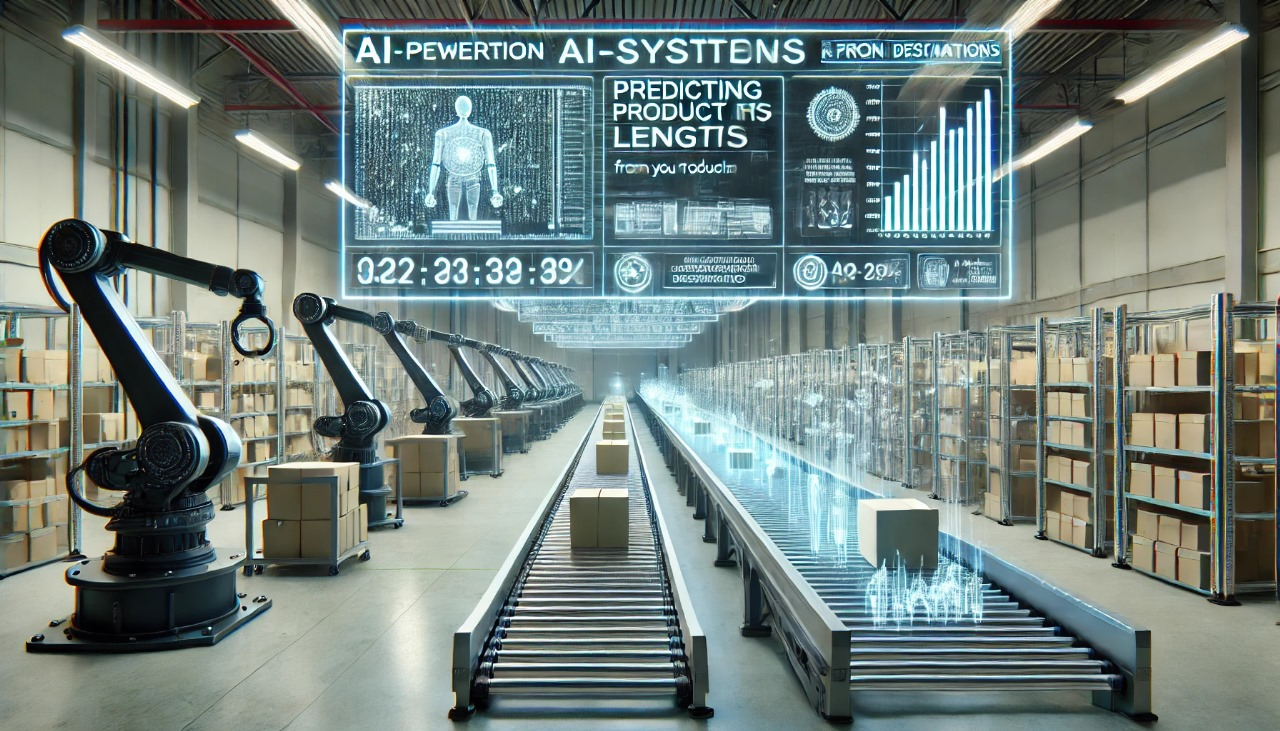

# **LINEAR REGRESSION**

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split


X_train = torch.tensor(train_embeddings, dtype=torch.float32)
y_train = torch.tensor(train_data['PRODUCT_LENGTH'], dtype=torch.float32)
X_test = torch.tensor(test_embeddings, dtype=torch.float32)
y_test = torch.tensor(test_data['PRODUCT_LENGTH'].values, dtype=torch.float32)
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

We are implementing a linear regression model using PyTorch to predict the PRODUCT_LENGTH based on the embeddings generated earlier from the text data. The model is trained for 10 epochs, with each epoch involving both training and validation steps. During training, the model uses a ReLU activation function after the linear transformation to ensure non-linearity. The code tracks the training and validation loss at each epoch, printing the results after every epoch. After training, the model evaluates its performance on the test dataset, calculating the MAE, Mean Squared Error (MSE), and R2 score.



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in tqdm(range(num_epochs)):
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                X_batch, y_batch = X_batch.cuda(), y_batch.cuda()
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader.dataset):.4f}, Validation Loss: {val_loss/len(test_loader.dataset):.4f}")

    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model(inputs)
            all_predictions.extend(outputs.cpu().numpy().flatten())
            all_targets.extend(targets.cpu().numpy().flatten())


    mae = mean_absolute_error(all_targets, all_predictions)
    mse = mean_squared_error(all_targets, all_predictions)
    r2 = r2_score(all_targets, all_predictions)
    print("\nTest Metrics:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")



In [ ]:
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear(x)
        x = self.relu(x)
        return x

linear_model = LinearRegressionModel(train_embeddings.shape[1]).cuda()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(linear_model.parameters(), lr=0.001)

train_model(linear_model, train_loader, test_loader, criterion, optimizer)

 10%|████▍                                       | 1/10 [00:17<02:37, 17.54s/it]

Epoch 1/10, Train Loss: 4248.6939, Validation Loss: 3418.7233


 20%|████████▊                                   | 2/10 [00:35<02:20, 17.55s/it]

Epoch 2/10, Train Loss: 4036.6496, Validation Loss: 3347.4482


 30%|█████████████▏                              | 3/10 [00:53<02:04, 17.84s/it]

Epoch 3/10, Train Loss: 4014.8657, Validation Loss: 3341.6389


 40%|█████████████████▌                          | 4/10 [01:10<01:46, 17.75s/it]

Epoch 4/10, Train Loss: 4010.7715, Validation Loss: 3338.8086


 50%|██████████████████████                      | 5/10 [01:28<01:28, 17.71s/it]

Epoch 5/10, Train Loss: 4008.6294, Validation Loss: 3337.2063


 60%|██████████████████████████▍                 | 6/10 [01:46<01:11, 17.86s/it]

Epoch 6/10, Train Loss: 4007.3574, Validation Loss: 3336.1750


 70%|██████████████████████████████▊             | 7/10 [02:04<00:53, 17.78s/it]

Epoch 7/10, Train Loss: 4006.5017, Validation Loss: 3335.4363


 80%|███████████████████████████████████▏        | 8/10 [02:21<00:35, 17.68s/it]

Epoch 8/10, Train Loss: 4005.8465, Validation Loss: 3334.8659


 90%|███████████████████████████████████████▌    | 9/10 [02:39<00:17, 17.60s/it]

Epoch 9/10, Train Loss: 4005.3343, Validation Loss: 3334.4038


100%|███████████████████████████████████████████| 10/10 [02:56<00:00, 17.67s/it]

Epoch 10/10, Train Loss: 4004.9120, Validation Loss: 3334.0070



Test Metrics:
MAE: 3334.4683
MSE: 593121181696.0000
R2 Score: -0.0000


# **LASSO REGRESSION**

In this new model, the Lasso regression is applied to predict the PRODUCT_LENGTH. Lasso regression is a linear regression technique with an L1 regularization term that encourages sparsity in the model by penalizing the magnitude of the coefficients. The training process is similar to the previous model, with the addition of an L1 penalty (Lasso regularization) to the loss function, controlled by a hyperparameter. During training, the loss function includes both the Mean Squared Error (MSE) loss and the L1 regularization term. The model is trained for 10 epochs, and the training loss is printed at each epoch, showing how the model's performance evolves over time.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



lasso_model = LinearRegressionModel(train_embeddings.shape[1]).cuda()


criterion = nn.MSELoss()


optimizer = optim.Adam(lasso_model.parameters(), lr=0.001)


def train_lasso_model(model, train_loader, test_loader, criterion, optimizer, l1_lambda=0.01):
    model.train()
    for epoch in tqdm(range(10)):
        for inputs, targets in train_loader:
            inputs, targets = inputs.cuda(), targets.cuda()
            optimizer.zero_grad()


            outputs = model(inputs)
            loss = criterion(outputs, targets)


            l1_regularization = l1_lambda * torch.norm(model.linear.weight, p=1)
            total_loss = loss + l1_regularization


            total_loss.backward()
            optimizer.step()

        print(f"Epoch {epoch+1}, Loss: {total_loss.item()}")


    model.eval()
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.cuda(), targets.cuda()
            outputs = model(inputs)
            all_predictions.extend(outputs.cpu().numpy().flatten())
            all_targets.extend(targets.cpu().numpy().flatten())


    mae = mean_absolute_error(all_targets, all_predictions)
    mse = mean_squared_error(all_targets, all_predictions)
    r2 = r2_score(all_targets, all_predictions)
    print("\nTest Metrics:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}")


train_lasso_model(lasso_model, train_loader, test_loader, criterion, optimizer, l1_lambda=0.01)

  0%|                                                    | 0/10 [00:00<?, ?it/s]/export/kbodla/venv/lib64/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/export/kbodla/venv/lib64/python3.11/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
 10%|████▍                                       | 1/10 [00:15<02:19, 15.49s/it]

Epoch 1, Loss: 3637037.25


 20%|████████▊                                   | 2/10 [00:30<02:03, 15.44s/it]

Epoch 2, Loss: 3003684.75


 30%|█████████████▏                              | 3/10 [00:46<01:47, 15.42s/it]

Epoch 3, Loss: 13617281.0


 40%|█████████████████▌                          | 4/10 [01:01<01:32, 15.45s/it]

Epoch 4, Loss: 1441992.625


 50%|██████████████████████                      | 5/10 [01:17<01:17, 15.45s/it]

Epoch 5, Loss: 2684213.25


 60%|██████████████████████████▍                 | 6/10 [01:32<01:01, 15.47s/it]

Epoch 6, Loss: 293372.09375


 70%|██████████████████████████████▊             | 7/10 [01:48<00:46, 15.47s/it]

Epoch 7, Loss: 791911.25


 80%|███████████████████████████████████▏        | 8/10 [02:03<00:30, 15.48s/it]

Epoch 8, Loss: 2114727.75


 90%|███████████████████████████████████████▌    | 9/10 [02:19<00:15, 15.46s/it]

Epoch 9, Loss: 2648290.25


100%|███████████████████████████████████████████| 10/10 [02:34<00:00, 15.46s/it]

Epoch 10, Loss: 3500056.25



Test Metrics:
MAE: 3474.8020
MSE: 593123344384.0000
R2 Score: -0.0000


# **XG-BOOST**

In this section, XGBoost, a powerful gradient boosting algorithm, is applied to predict the PRODUCT_LENGTH. The model is configured with hyperparameters such as n_estimators=100 (number of boosting rounds), learning_rate=0.05 (step size), and max_depth=2 (maximum depth of each tree), and is trained using the training data embeddings. The model is then evaluated on the test data by predicting the PRODUCT_LENGTH values and comparing them to the true values using common regression metrics.

In [ ]:
pip install xgboost

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=2,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(train_embeddings, train_data['PRODUCT_LENGTH'])

xgb_predictions = xgb_model.predict(test_embeddings)

xgb_mae = mean_absolute_error(test_data['PRODUCT_LENGTH'], xgb_predictions)
xgb_rmse = np.sqrt(mean_squared_error(test_data['PRODUCT_LENGTH'], xgb_predictions))
xgb_r2 = r2_score(test_data['PRODUCT_LENGTH'], xgb_predictions)

print(f"XGBoost - MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}, R²: {xgb_r2:.4f}")

XGBoost - MAE: 12346.8647, RMSE: 793571.9632, R²: -0.0618


# **LightGBM Regressor**

We are using the LightGBM Regressor for this task because it is a powerful gradient boosting framework that is highly efficient for large datasets. LightGBM is known for its speed and scalability, making it well-suited for tasks involving large amounts of data and features. Additionally, LightGBM performs well in a variety of regression tasks due to its ability to handle complex relationships and non-linear patterns in the data, which could be beneficial for our dataset.

In [ ]:
pip install lightgbm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

lgbm_model.fit(train_embeddings, train_data['PRODUCT_LENGTH'])

lgbm_predictions = lgbm_model.predict(test_embeddings)

lgbm_mae = mean_absolute_error(test_data['PRODUCT_LENGTH'], lgbm_predictions)
lgbm_rmse = np.sqrt(mean_squared_error(test_data['PRODUCT_LENGTH'], lgbm_predictions))
lgbm_r2 = r2_score(test_data['PRODUCT_LENGTH'], lgbm_predictions)

print(f"LightGBM - MAE: {lgbm_mae:.4f}, RMSE: {lgbm_rmse:.4f}, R²: {lgbm_r2:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.213002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 1558944, number of used features: 384
[LightGBM] [Info] Start training from score 4448.699268
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM - MAE: 10193.2177, RMSE: 815944.0921, R²: -0.1225


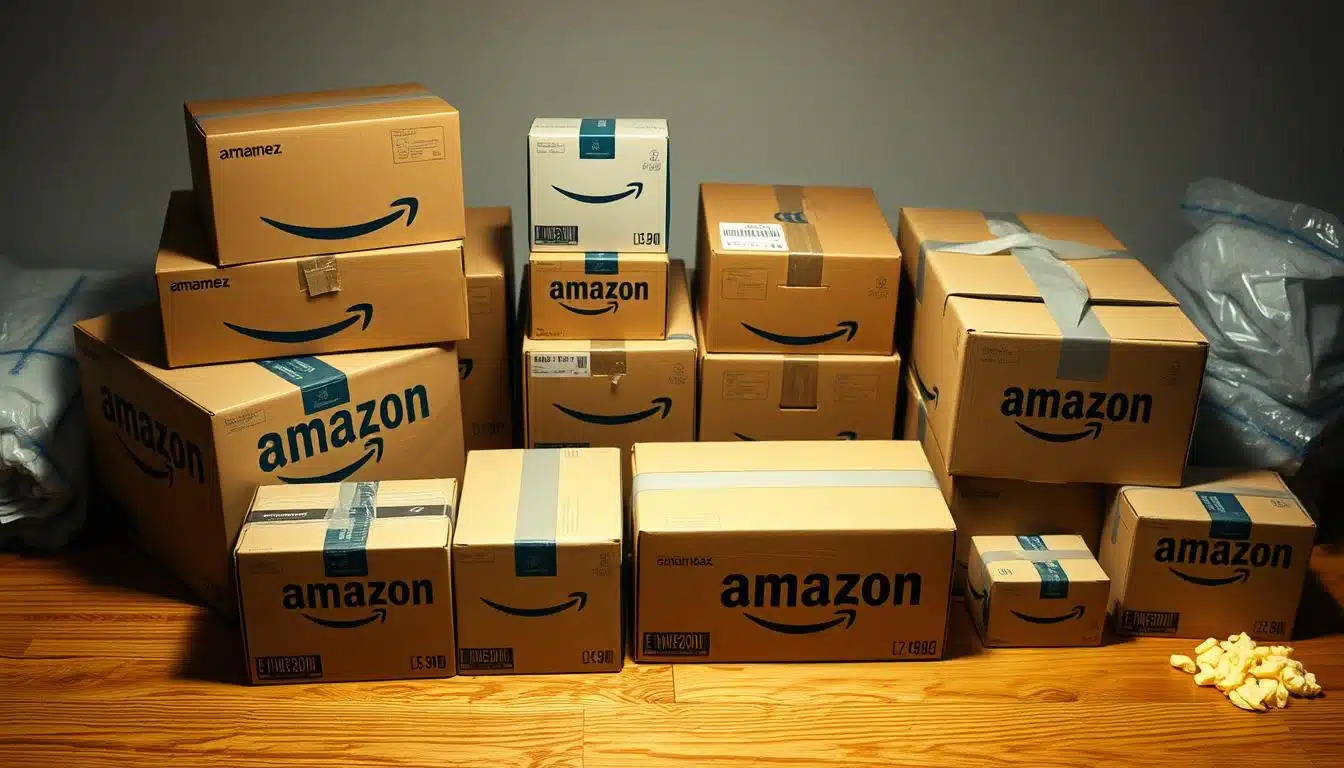

# **CONCLUSION**

The  training dataset is split into 70:20:10 ratio for training,testing and validation. Due to the constraint of large volume of data, we were not able to perform the hyper-parameter selection on XG-Boost and light-GBM. When we were trying to perform  hyperparameter tuning with grid search for each fit on the  dataset ,due to the insufficient  compute power the selection process did not result in an expected outcome. In comparison to the default XG-Boost and Light-GBM methods, custom written linear and lasso regression performed well on the data hinting to a potential linear relations between the input and the output.

![Alt Text](https://raw.githubusercontent.com/Souri02/souri02.github.io/main/gif.gif)


# **BIBLIOGRAPHY**

The following resources have been referenced throughout this project to gain a deeper understanding of the data science lifecycle, machine learning algorithms, data visualization, and the role of data science in decision-making:

Data Source: https://www.hackerearth.com/challenges/competitive/amazon-ml-challenge-2023/machine-learning/product-length-prediction-7-85b7ef50/

DataScience  Data Science Life Cycle. Retrieved from https://www.datascience-pm.com/data-science-life-cycle/

GeeksforGeeks  Data Science Lifecycle. Retrieved from https://www.geeksforgeeks.org/data-science-lifecycle/

Wikipedia  https://en.wikipedia.org/wiki/Data_science

IBM https://www.ibm.com/topics/data-science

Scikit-learn Preprocessing data. Retrieved from https://scikit-learn.org/stable/modules/preprocessing.html

As further references the following links were also used:

https://www.geeksforgeeks.org/machine-learning-algorithms/

https://www.ibm.com/topics/data-visualization#:~:text=the%20next%20step-,What%20is%20data%20visualization%3F,that%20is%20easy%20to%20understand.

https://en.wikipedia.org/wiki/Data_and_information_visualization

https://www.mathworks.com/discovery/parameter-estimation.html#:~:text=Parameter%20estimation%20is%20the%20process,data%2Dbased%20Simulink%C2%AE%20models.

https://iabac.org/blog/importance-of-data-science-in-decision-making#:~:text=Data%20science%20turns%20raw%20data,ahead%20in%20a%20competitive%20market.


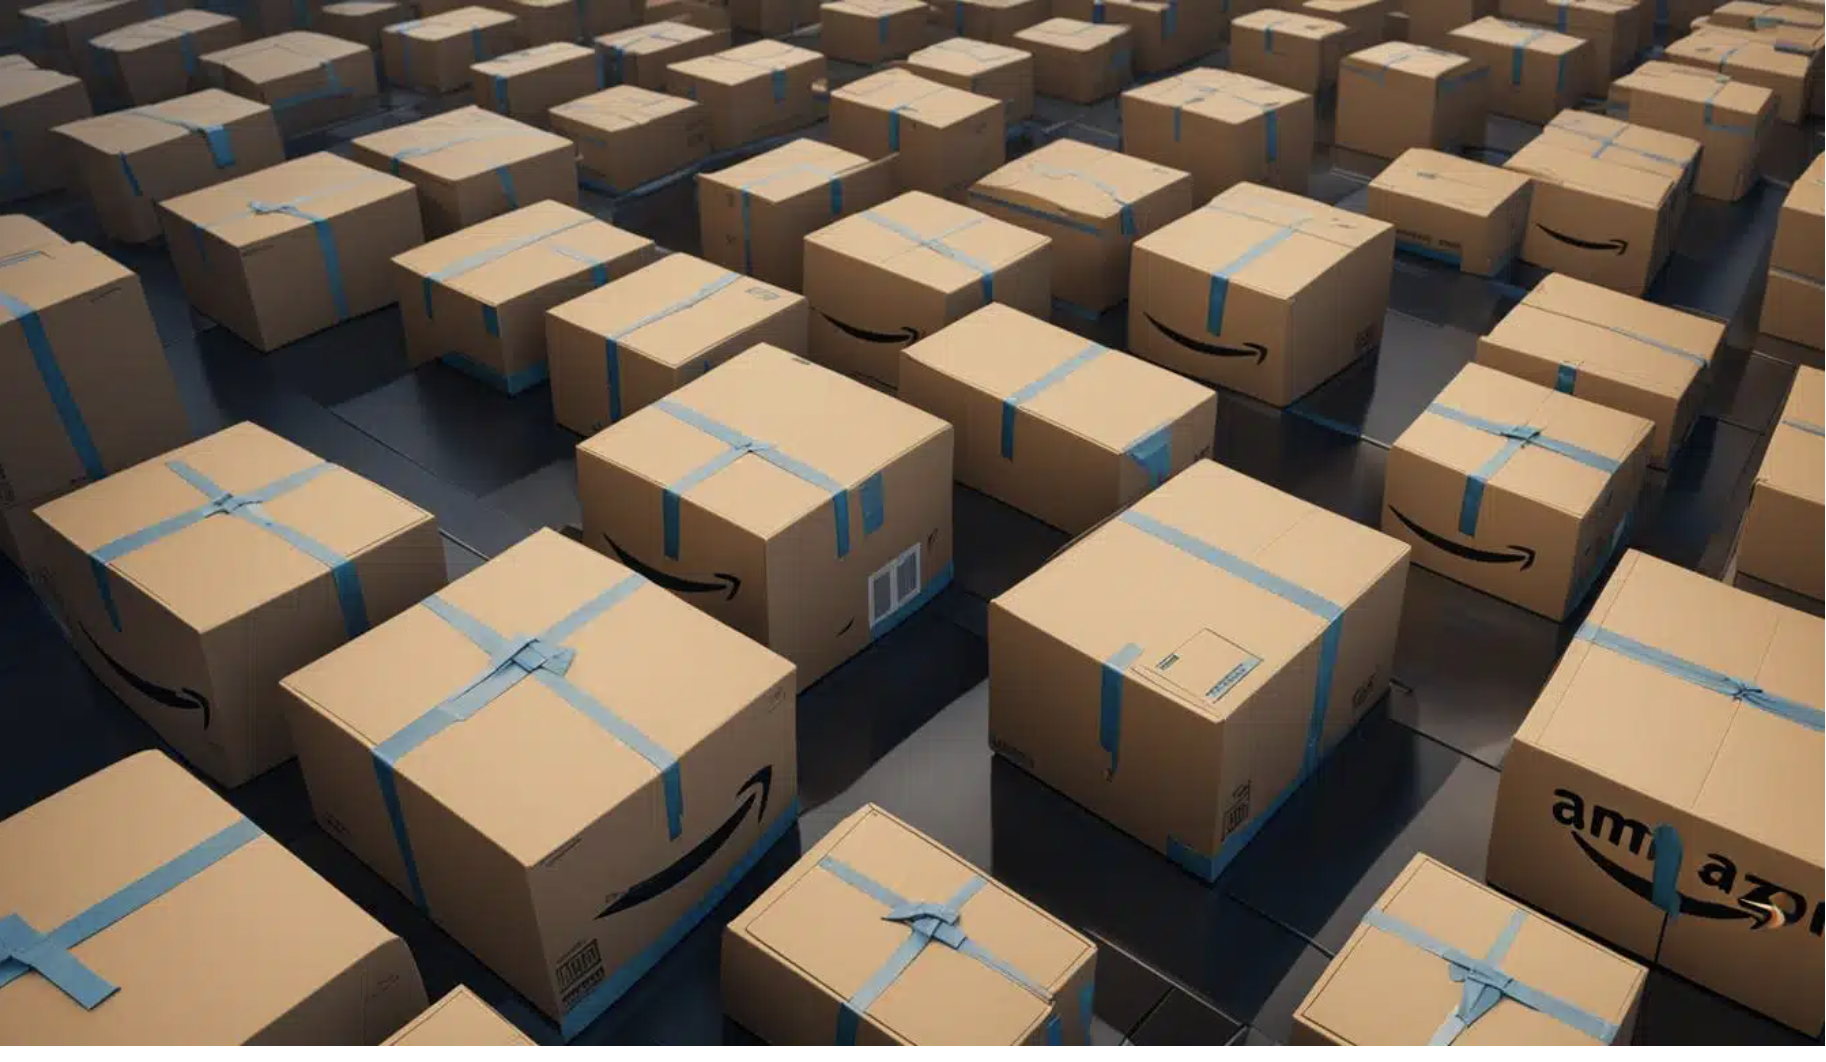